In [47]:
from datetime import datetime
from code.data import Data
from code.clustering import TrackClustering
from code.experiments import *
from code.models import *
%matplotlib inline

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
data = Data("lastfm-dataset-1K\userid-timestamp-artid-artname-traid-traname.tsv")

Skipping line 2120260: expected 6 fields, saw 8

Skipping line 2446318: expected 6 fields, saw 8

Skipping line 11141081: expected 6 fields, saw 8

Skipping line 11152099: expected 6 fields, saw 12
Skipping line 11152402: expected 6 fields, saw 8

Skipping line 11882087: expected 6 fields, saw 8

Skipping line 12902539: expected 6 fields, saw 8
Skipping line 12935044: expected 6 fields, saw 8

Skipping line 17589539: expected 6 fields, saw 8



### Experiment to check if testing finish date is important to the results 

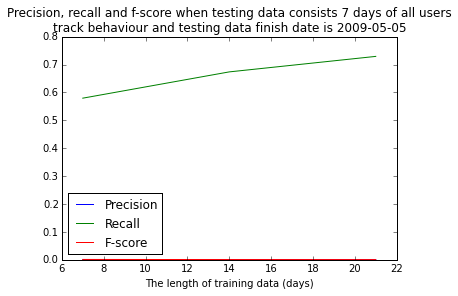

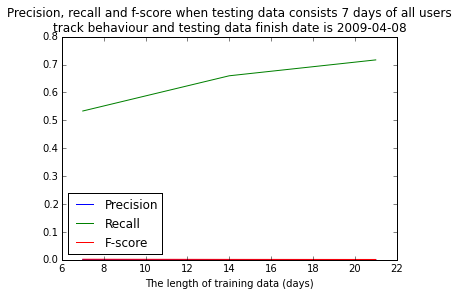

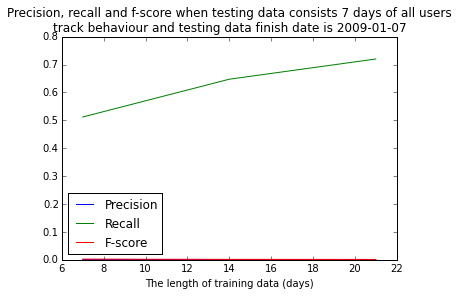

In [6]:
training_lengths = [21,14,7]
testing_lengths = [7]
testing_finish_dates = [datetime(2009, 5, 5), datetime(2009, 4, 8), datetime(2009, 1, 7)]

experiment = DataExperiment(training_lengths, testing_lengths, testing_finish_dates, AllPreviousTracks)
experiment.run(data, exp_id=0)

#### The scores are similar for all testing finish dates, therefore there are no anomalies with the data and we can fix testing finish date to 2009-05-05 as it will not have an impact on the findings below.

### Experiment to find the upper bound for the recall for specific parameter values

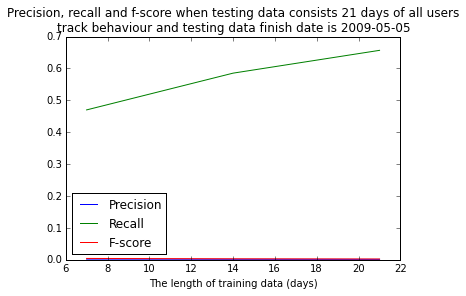

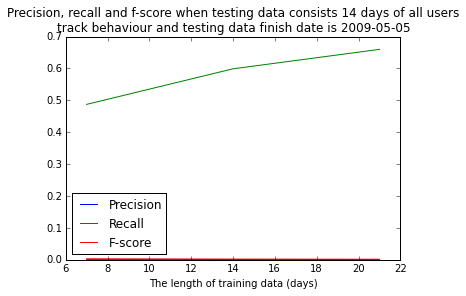

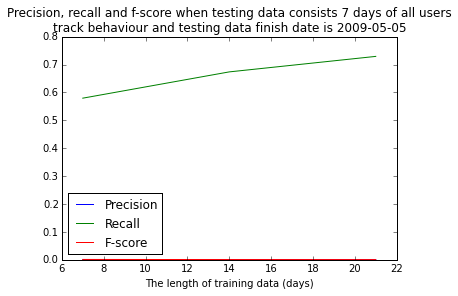

In [7]:
training_lengths = [21,14,7]
testing_lengths = [21,14,7]
testing_finish_dates = [datetime(2009, 5, 5)]

experiment = DataExperiment(training_lengths, testing_lengths, testing_finish_dates, AllPreviousTracks)
experiment.run(data, exp_id=0, as_graph=True)

In [ ]:
for i in [7,14,21]:
    _ = data.create_experiment_data(i, i, datetime(2009, 5, 5), 0)
    model = AllPreviousTracks(data, 0)
    model.run()

#### As expected, it does not matter how many days of testing data we use for evaluation, more training data will always result with better recall.

### Experiment to find the relation between training length and testing length

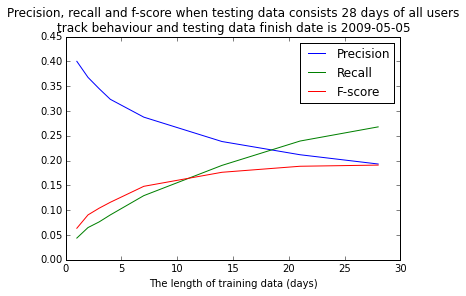

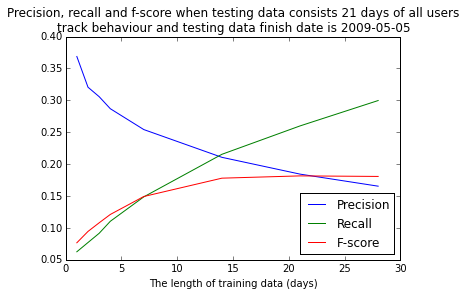

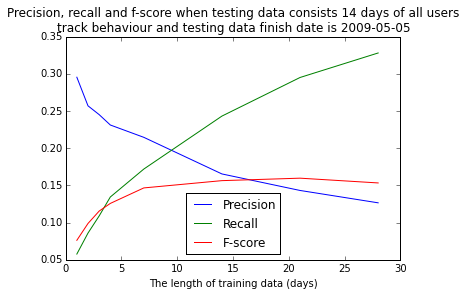

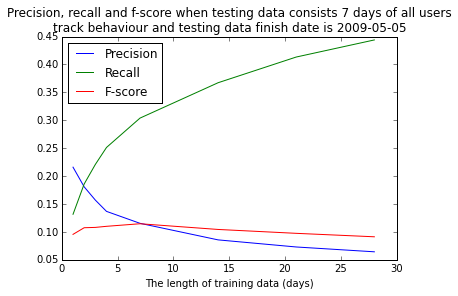

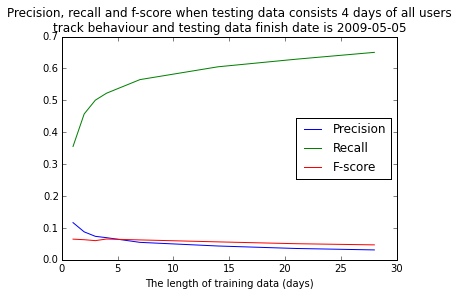

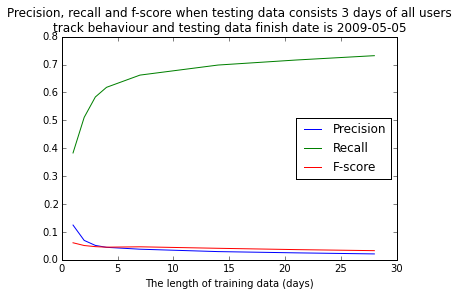

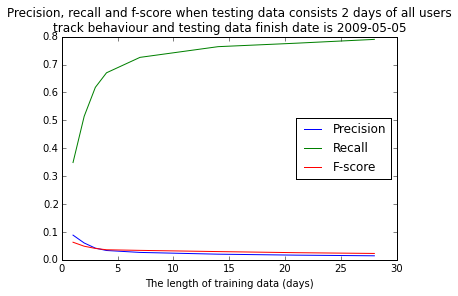

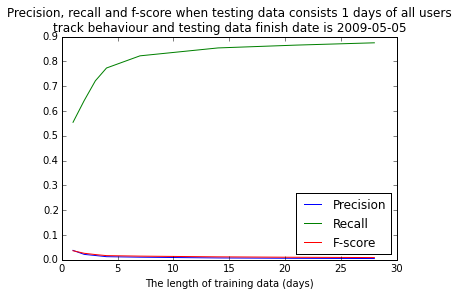

In [21]:
training_lengths = [28,21,14,7,4,3,2,1]
testing_lengths = [28,21,14,7,4,3,2,1]
testing_finish_dates = [datetime(2009, 5, 5)]

experiment = DataExperiment(training_lengths, testing_lengths, testing_finish_dates, UserPreviousTracks)
experiment.run(data, exp_id=0)

#### Results suggest that best f-score is achieved when training length is equal to testing length 

### Experiment to find the best N for NMostOften model

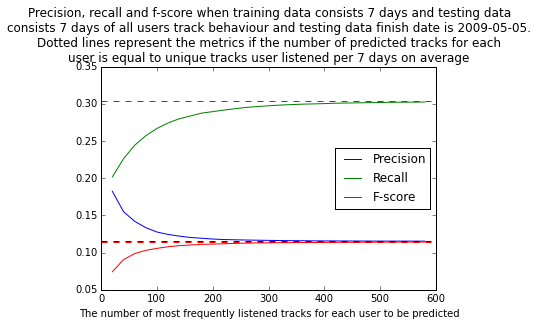

In [20]:
n = [i for i in xrange(0, 600, 20)]
training_length = 7
testing_length = 7
finish_testing = datetime(2009, 5, 5)
experiment = NMostOftenExperiment(training_length, testing_length, finish_testing, data, exp_id=0, n_values=n)
experiment.run()

#### The best f-score is achieved with N being equal to unique tracks user listened per 7 days period on average and its score is given below:

In [37]:
id_1 = data.create_experiment_data(7, 7, datetime(2009, 5, 5), 1, True)
model = NMostOften(data, id_1, n_most_often=0)
_ = model.run()

==== NMostOften ====
Model precision: 0.115391539179
Model recall: 0.303923845349
F1 score: 0.114608420871


### We now start using clustered track network

The modularity of the network is 0.997703


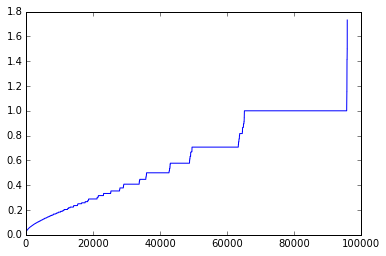

In [39]:
training_data = data.get_training_data(id_1)
clustering = TrackClustering(training_data, maximum_diff=60, minimum_similarity=0.5)
clustering.run(plot_similarities=True)

#### We run each model with the clustered track network created above  

In [45]:
model = NFromCluster(data, id_1, cluster=clustering, from_clusters='all')
_ = model.run()

==== NFromCluster ====
Model precision: 0.0413473209357
Model recall: 0.31757420223
F1 score: 0.0488867946537


#### By selecting all tracks from all user clusters the recall is improved just by a bit, however precision drops significantly

In [43]:
model = NFromCluster(data, id_1, cluster=clustering, from_clusters='top')
_ = model.run()

==== NFromCluster ====
Model precision: 0.115391539179
Model recall: 0.303923845349
F1 score: 0.114608420871


#### By selecting most often listened tracks from each cluster the score is the same as with NMostOften model

In [44]:
model = CommonNeighborsWithinCluster(data, id_1, cluster=clustering)
_ = model.run()

==== CommonNeighborsWithinCluster ====
Model precision: 0.143550832141
Model recall: 0.176919616125
F1 score: 0.0813952107949


The modularity of the network is 0.999076
==== NFromCluster ====
Model precision: 0.0708671458093
Model recall: 0.254794130376
F1 score: 0.0845201743604
==== NFromCluster ====
Model precision: 0.16540317617
Model recall: 0.243160206328
F1 score: 0.156396488007
==== CommonNeighborsWithinCluster ====
Model precision: 0.169213921955
Model recall: 0.0988703833505
F1 score: 0.0730638595819


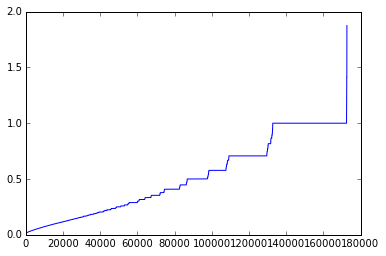

In [49]:
id_2 = data.create_experiment_data(14, 14, datetime(2009, 5, 5), 1, True)
training_data = data.get_training_data(id_2)
clustering = TrackClustering(training_data, maximum_diff=60, minimum_similarity=0.5)
clustering.run(plot_similarities=True)
model = NFromCluster(data, id_2, cluster=clustering, from_clusters='all')
_ = model.run()
model = NFromCluster(data, id_2, cluster=clustering, from_clusters='top')
_ = model.run()
model = CommonNeighborsWithinCluster(data, id_2, cluster=clustering)
_ = model.run()

#### Using common neighbor technique, f-score is worse than previous model's, however precision is way better.

The modularity of the network is 0.998065
The modularity of the network is 0.997703
The modularity of the network is 0.997331
The modularity of the network is 0.997012
The modularity of the network is 0.996731
The modularity of the network is 0.996192
The modularity of the network is 0.995767


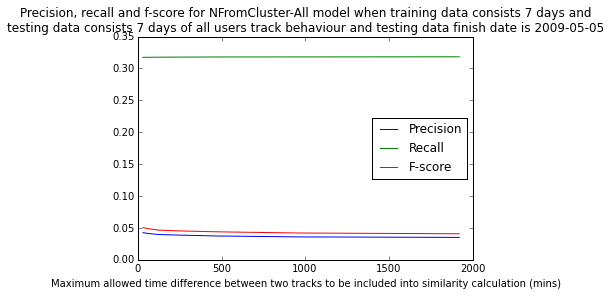

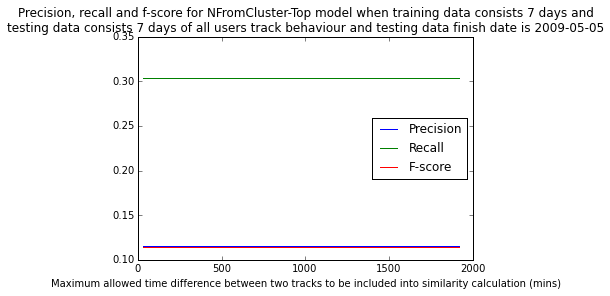

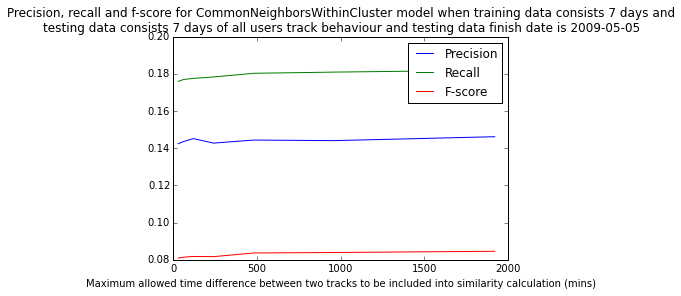

In [19]:
n = [30, 60, 120, 240, 480, 960, 1920]
training_length = 7
testing_length = 7
finish_testing = datetime(2009, 5, 5)
experiment = ClusteringExperiment(training_length, testing_length, finish_testing, data, exp_id=0, n_values=n)
experiment.run()

The modularity of the network is 0.997703
The modularity of the network is 0.999374
The modularity of the network is 0.999366
The modularity of the network is 0.999759


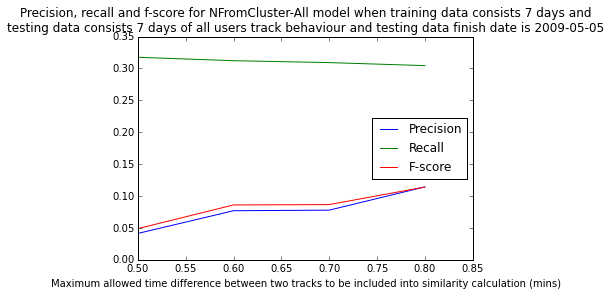

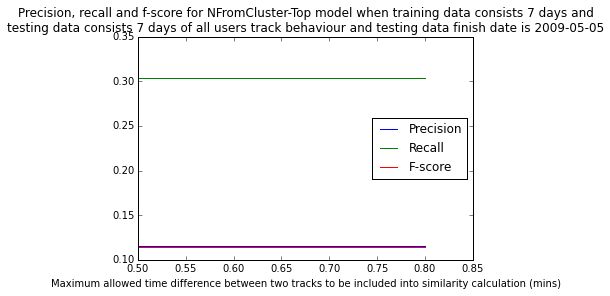

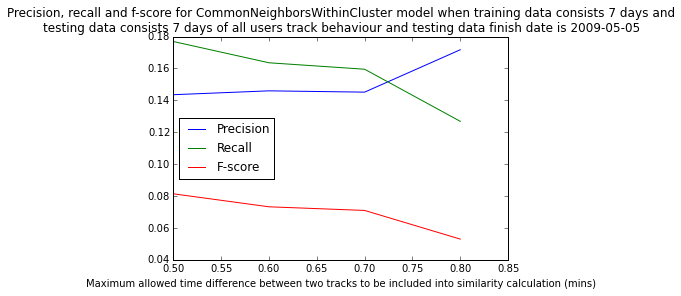

In [48]:
n = [0.5,0.6,0.7,0.8]
training_length = 7
testing_length = 7
finish_testing = datetime(2009, 5, 5)
experiment = ClusteringExperiment(training_length, testing_length, finish_testing, data, exp_id=0, n_values=n)
experiment.run()

#### If we were actually using common neighbor technique where also pairs of listened tracks from different clusters are considered then the precision would be even higher, however not significantly and for bigger training and testing sets this technique would be infeasible  

In [ ]:
model = CommonNeighbors(data, id_1, cluster=clustering)
_ = model.run()

==== by_common_neighbors ====
Model precision: 0.160753563597
Model recall: 0.178441045417
F1 score: 0.0848058892443


(0.16075356359706575, 0.17844104541658393, 0.08480588924427827)